# Introduction to Image Processing

<img src="https://i.imgur.com/Kfm0W0B.png" width=600  /><img src="https://i.imgur.com/rTsLx6j.png" width=360  />

### 本章節內容大綱
* [用 opencv 開一張影像小試身手](#用-opencv-開一張影像小試身手)
* [用 cv2 將影像存檔](#用-cv2-將影像存檔)
* [用 Matplotlib 開檔、存取影像](#用-Matplotlib-開檔、存取影像)
* [將 BGR 轉成 RGB](#將-BGR-轉成-RGB)
* [將 RGB 轉成 GrayScale 灰階影像](#將-RGB-轉成-GrayScale-灰階影像)
* [將 Gray 轉成 RGB](#將-Gray-轉成-RGB)
* [將 RGB 轉成 HSV](#將-RGB-轉成-HSV)
* [將 RGB 轉成 HSL](#將-RGB-轉成-HSL)

In [1]:
# opencv 在 python 中的 module 為 cv2
import cv2
import matplotlib.pyplot as plt
import numpy as np

* ### 用 opencv 開一張影像小試身手

In [2]:
# upload Data
!wget -q https://github.com/TA-aiacademy/course_3.0/releases/download/CVCNN_Data/CVCNN_part1.zip
!unzip -q CVCNN_part1

In [3]:
image = cv2.imread("Lenna.jpg")
# image = cv2.imread("Lenna.jpg", cv2.IMREAD_COLOR)
# image = cv2.imread("Lenna.jpg", cv2.IMREAD_GRAYSCALE)
# image = cv2.imread("Lenna.jpg", cv2.IMREAD_UNCHANGED)

$\underline{使用方法}$<br>
cv2.imread 在讀取影像時，可以在第二個參數指定讀取影像的格式，可用的選項有三種：
1. cv2.IMREAD_COLOR: 1，此為 default 預設值，這種格式會讀取 BGR 三個 channels 通道的彩色影像，忽略透明度 alpha 的 channel 通道。
2. cv2.IMREAD_GRAYSCALE: 0，以灰階的格式來讀取影像。
3. cv2.IMREAD_UNCHANGED: -1，讀取影像中所有的 channels，包含透明度 alpha 的 channel 通道。

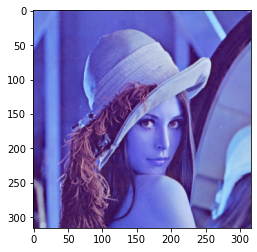

In [4]:
plt.imshow(image)
plt.show()

In [5]:
image.shape

(316, 316, 3)

* #### 可見光光譜

# <img src="https://i.imgur.com/nqmJWEj.png" width="700">

In [6]:
image.dtype

dtype('uint8')

In [7]:
image.min()

3

In [8]:
image.max()

255

In [9]:
256*256*256

16777216

[(back...)](#Introduction-to-Image-Processing)

* ### 用 cv2 將影像存檔

In [10]:
cv2.imwrite('my_Lenna.jpg', image)
# cv2.imwrite('my_Lenna.bmp', image)
# cv2.imwrite('my_Lenna.png', image)
# cv2.imwrite('my_Lenna.tiff', image)

True

In [11]:
# 設定 JPEG 圖片品質為 90（可用值為 0 ~ 100）
cv2.imwrite('my_Lenna.jpg', image, [cv2.IMWRITE_JPEG_QUALITY, 90])

# 設定 PNG 壓縮層級為 5（可用值為 0 ~ 9）
cv2.imwrite('my_Lenna.png', image, [cv2.IMWRITE_PNG_COMPRESSION, 5])

True

[(back...)](#Introduction-to-Image-Processing)

* ### 用 Matplotlib 開檔、存取影像
 - Matplotlib 便是 RGB

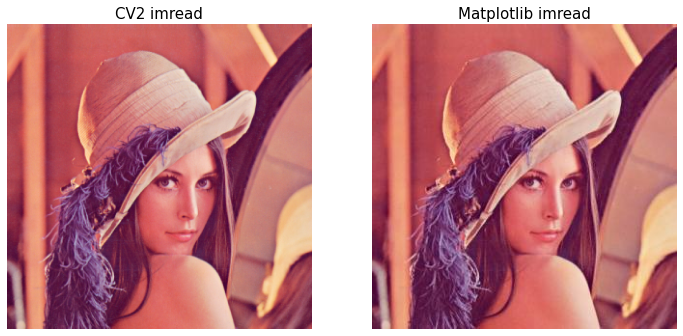

In [12]:
image = plt.imread('Lenna.jpg')
plt.imsave('my_Lenna.jpg', image)

image_new = plt.imread('my_Lenna.jpg')

img_list = [image, image_new]
title = ["CV2 imread", "Matplotlib imread"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#Introduction-to-Image-Processing)

* ### 將 BGR 轉成 RGB

In [13]:
image = cv2.imread('Lenna.jpg')

兩種轉法結果一樣嗎? 答案是 True



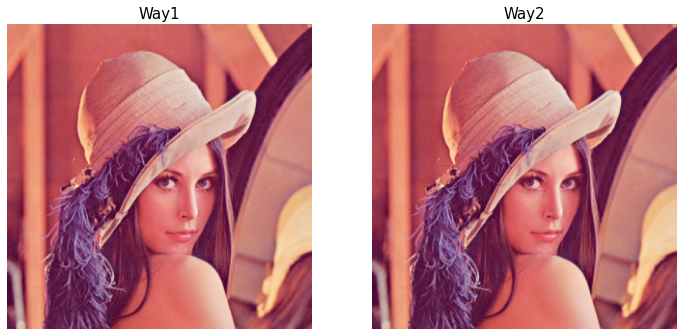

In [14]:
# Way1 : 使用 cv2.COLOR_BGR2RGB
rgb_image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Way2: 用矩陣運算更動
rgb_image2 = image[:, :, ::-1]


ans = np.array_equiv(rgb_image1, rgb_image2)
print("兩種轉法結果一樣嗎? 答案是 {}\n".format(ans))


img_list = [rgb_image1, rgb_image2]
title = ["Way1", "Way2"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#Introduction-to-Image-Processing)

In [15]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

* ### 將 RGB 轉成 GrayScale 灰階影像

Way2, Way3 轉法結果一樣嗎? 答案是 False



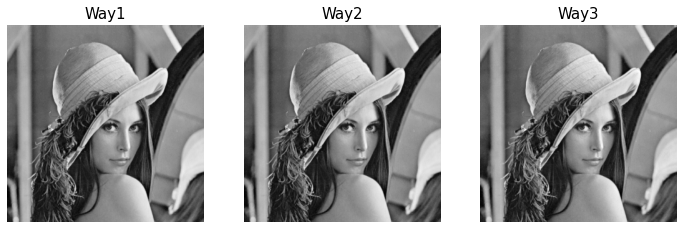

In [16]:
# Way1 : 在開檔時，設定為灰階
gray_image1 = cv2.imread("Lenna.jpg", 0)

# Way2 : 使用 cv2.COLOR_RGB2GRAY
gray_image2 = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

# Way3: 用矩陣運算轉換
gray_image3 = rgb_image.mean(-1).astype('uint8')


ans = np.array_equal(gray_image2, gray_image3)
print("Way2, Way3 轉法結果一樣嗎? 答案是 {}\n".format(ans))


img_list = [gray_image1, gray_image2, gray_image3]
title = ["Way1", "Way2", "Way3"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 3, i+1)
    plt.imshow(each, cmap="gray")
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

# <img src="https://drive.google.com/uc?export=view&id=1xtqjT5pjEhBM8wLKPzdNNL2TMUkNuoOE" width="250">

-- 大多數人都誤以為彩色轉灰階就是 (R+G+B)/3 <br>
-- 人眼對 $\color{green}{綠色}$ 的亮度最為敏感，而對 $\color{blue}{藍色}$ 的亮度敏感度最低 <br>
-- 公認的轉換比例 Gray = 0.299 * $\color{red}{R}$ + 0.587 * $\color{green}{G}$ + 0.114 * $\color{blue}{B}$

#### $\color{red}{\underline{\textbf{Question}}}$
$\color{red}{試想看看下列兩種運算方法，為什麼會有不一樣的結果呢？}$

Way1, Way2 計算方法結果一樣嗎? 答案是 False



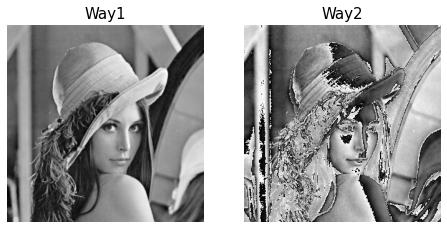

In [17]:
# Way1
way_image1 = rgb_image.mean(-1)

# Way2
way_image2 = (rgb_image[:, :, 0] +
              rgb_image[:, :, 1] +
              rgb_image[:, :, 2]) // 3

ans = np.array_equal(way_image1, way_image2)
print("Way1, Way2 計算方法結果一樣嗎? 答案是 {}\n".format(ans))


img_list = [way_image1, way_image2]
title = ["Way1", "Way2"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 3, i+1)
    plt.imshow(each, cmap='gray')
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

$[\underline{Hint}]$ rgb_image.dtype

[(back...)](#Introduction-to-Image-Processing)

In [18]:
gray_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)

* ### 將 Gray 轉成 RGB

In [19]:
gray_image.shape

(316, 316)

In [20]:
new_rgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)

In [21]:
new_rgb.shape

(316, 316, 3)

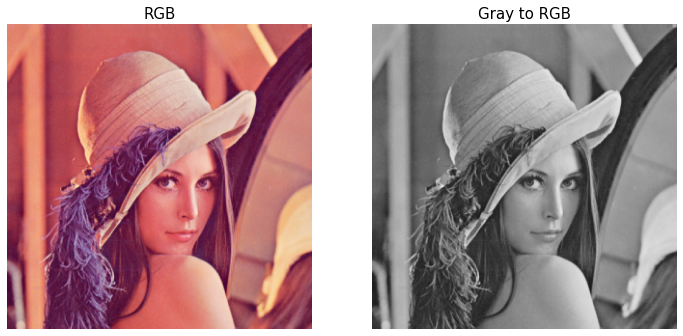

In [22]:
img_list = [rgb_image, new_rgb]
title = ["RGB", "Gray to RGB"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 2, i+1)
    plt.imshow(each)
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

In [23]:
np.array_equal(new_rgb[:, :, 0], new_rgb[:, :, 1])

True

$\color{red}{[注意]}$ 一旦影像轉成灰階，就無法復原成彩圖了。

* #### 常見的影像格式:
 - RGB
 - GrayScale
 - YCrCb (Luminance 明亮度, Chrominance 色度, Chroma 濃度)
 - HSV (Hue 色相, Saturation 飽和度, Value 明度)
 - LAB (Luminance 明亮度, a 和 b 表示顏色對立維度)
 - ....
 
針對資料影像成像方式的不同，我們需要轉換成不同的格式讀取，才能在影像處理中有效地找到較好的特徵。

[(back...)](#Introduction-to-Image-Processing)

* #### HSL 和 HSV

# <img src="https://i.imgur.com/KgSMjYl.png" width=700  />

* ### 將 RGB 轉成 HSV

In [24]:
hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

In [25]:
hsv_image.shape

(316, 316, 3)

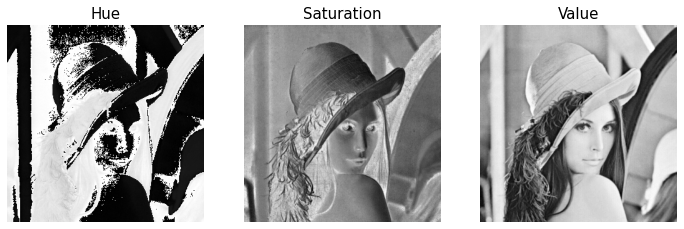

In [26]:
img_list = [hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]]
title = ["Hue", "Saturation", "Value"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 3, i+1)
    plt.imshow(each, cmap='gray')
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

[(back...)](#Introduction-to-Image-Processing)

* ### 將 RGB 轉成 HSL

In [27]:
hsl_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HLS)

In [28]:
hsl_image.shape

(316, 316, 3)

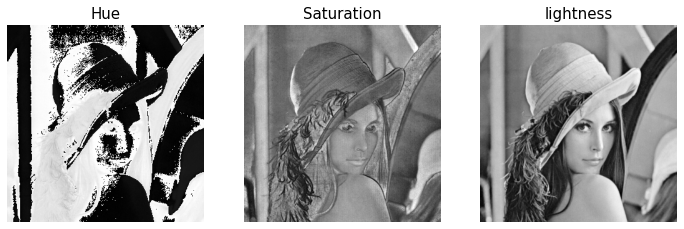

In [29]:
img_list = [hsl_image[:, :, 0], hsl_image[:, :, 2], hsl_image[:, :, 1]]
title = ["Hue", "Saturation", "lightness"]
plt.figure(figsize=(12, 12))
for i, each in enumerate(img_list):
    plt.subplot(1, 3, i+1)
    plt.imshow(each, cmap='gray')
    plt.title(title[i], fontsize=15)
    plt.axis("off")
plt.show()

HSV 和 HSL 兩種的色相(H)、飽和度(S)以及明亮度上的運算方法是不相同的。

[(back...)](#Introduction-to-Image-Processing)